In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = sns.load_dataset("titanic")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


# Data Prep (Pandas)

In [5]:
data["age"] = data["age"].fillna(data["age"].mean())

In [6]:
data["age"].isna().value_counts()

age
False    891
Name: count, dtype: int64

In [7]:
def male_or_f(m_or_f):
    if m_or_f == "male":
        return 0
    return 1

In [8]:
data["sex"] = data["sex"].apply(male_or_f)

Male and females are now numerically encoded. 0 for men, 1 for women.

# Visualizations

## Subplot 1

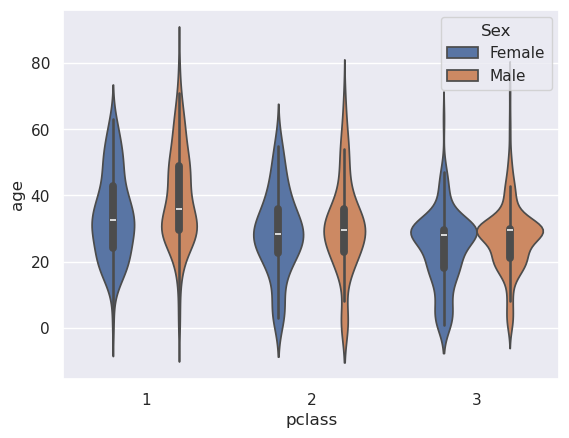

In [9]:
sns.set_theme()

data['sex_label'] = data['sex'].map({0: 'Male', 1: 'Female'})

sns.violinplot(data=data, x="pclass", y="age", hue="sex_label")
plt.legend(title="Sex")

Text(0, 0.5, 'Average age')

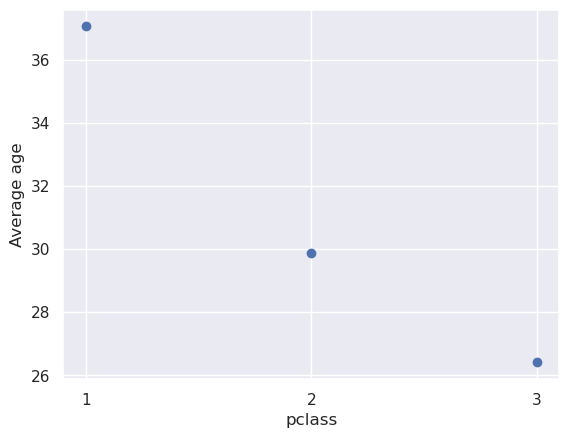

In [10]:
mean_age_pclass = data.groupby("pclass")["age"].mean()
plt.scatter(x=mean_age_pclass.index, y=mean_age_pclass.values)

plt.xticks([1,2,3])
plt.xlabel("pclass")
plt.ylabel("Average age")

## Subplot 2

<Axes: >

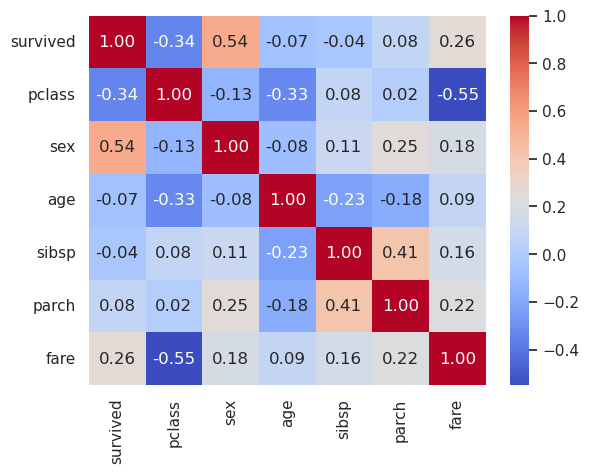

In [11]:
numeric_df = data.select_dtypes(include="number")
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")

## Subplot 3

Text(0, 0.5, 'Survived')

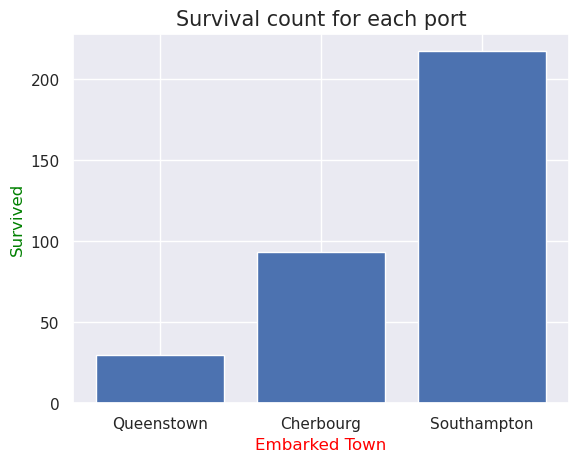

In [12]:
survived = data.groupby("embark_town")["survived"].sum().sort_values()
plt.bar(x=survived.index, height=survived)

plt.title("Survival count for each port", fontsize=15)
plt.xlabel("Embarked Town", color="red")
plt.ylabel("Survived", color="green")

### Key Takeaway
#### The survival count for each embarked town is proportional to the amount of people who Embarked from there

Text(0, 0.5, 'Survival Percentage %')

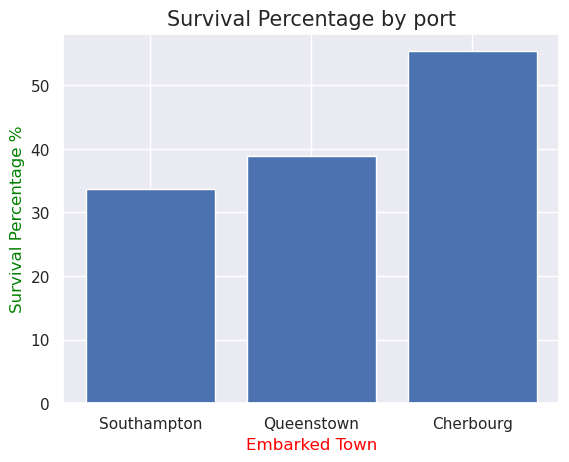

In [14]:
survival_percent = data.groupby('embark_town')['survived'].mean().sort_values() * 100

plt.bar(x=survival_percent.index, height=survival_percent)

plt.title("Survival Percentage by port", fontsize=15)
plt.xlabel("Embarked Town", color="red")
plt.ylabel("Survival Percentage %", color="green")

#### As we can see the survival percentage is a better way of showing the chances of survival